# Анализ интернет-магазина. Проверка гипотез для увеличения выручки

# Описание проекта

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки крупного интернет-магазина.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

# Описание данных

**Данные для первой части**

Структура /datasets/hypothesis.csv :
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

Структура /datasets/orders.csv :
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Структура /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

# Ход выполнения проекта

**Шаг 1. Загрузить данные и подготовьте их к анализу**

**Шаг 2. Приоритизация гипотез**

**Задача:**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Шаг 3. Анализ A/B-теста**

**Задача:**

Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Шаг 4. Вывод**

### Загрузить данные и подготовить их к анализу

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
from time import strptime

In [2]:
# загрузим данные о гипотезах, заказах и пользователях из CSV-файлов в переменные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

orders = pd.read_csv('/datasets/orders.csv')

visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# выведем общую информацию о гипотезах
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# выведем первые 5 строк датафрейма
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


В рассматриваемом датафрейме 5 столбцов, 9 строк и судя по всему нет пропусков.\
Можно привести столбцы к нижнему регистру.

In [5]:
# проверим наличие дубликатов
hypothesis.duplicated().sum()

0

Дубликатов нет.

In [6]:
# проверим наличие пропусков
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Пропусков нет.

In [7]:
# выведем общую информацию о заказах
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# выведем первые 5 строк датафрейма
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В таблице с заказами 5 столбцов, 1197 строк, судя по всему нет пропусков.\
Необходимо изменить тип данных столбца date, привести названия столбцов к змеиному формату.

In [9]:
# проверим наличие дубликатов
orders.duplicated().sum()

0

Дубликатов нет.

In [10]:
# проверим наличие пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропусков нет.

In [11]:
# выведем общую информацию о пользователях
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# выведем первые 5 строк датафрейма
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В датафрейме 3 столбца, 62 строки, судя по всему нет пропусков.\
Необходимо изменить тип данных столбца date.

In [13]:
# проверим наличие дубликатов
visitors.duplicated().sum()

0

Дубликатов нет.

In [14]:
# проверим наличие пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков нет.

**- Предобрабаботка данных**

In [15]:
# приведем столбцы hypothesis к нижнему регистру 
hypothesis.columns = hypothesis.columns.str.lower()

In [16]:
# выведем названия столбцов и проверим изменения
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [17]:
# переименуем столбцы
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [18]:
# выведем названия столбцов и проверим изменения
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [19]:
# приведем тип данных столбца orders['date'] к типу данных datetime64
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [20]:
# проверим изменения типов данных
orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

In [21]:
# приведем тип данных столбца visitors['date'] к типу данных datetime64
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [22]:
# проверим изменения типов данных
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Проверим корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы.

In [23]:
# выведем количество пользователей
orders['visitor_id' ].nunique()

1031

In [24]:
# посмотрим на разбиение количества пользователей по группам
orders.groupby('group').nunique('visitor_id')['visitor_id']

group
A    503
B    586
Name: visitor_id, dtype: int64

Всего в датафрейме оказалось 1031 пользователь. Из них 503 относятся к группе А и 586 к группе В. В группе В на 83 пользователя больше (16.5%) - достаточно большой процент, который может сказаться на итоговом результате, но в то же время "срезав" часть группы В тоже может привести к некорретным результатам.

In [25]:
# сгруппируем данные по пользователям и количеству попаданий в группу
orders_group = orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index()

In [26]:
# дадим стольбцам понятные названия
orders_group.columns = ['visitor_id', 'group_count']

In [27]:
# сделаем срез для пользователей попавшими в обе группы
double = orders_group.query('group_count > 1')

# посчитаем их количество
double['group_count'].count()

58

58 пользователей попало и в ту, и в другую группы. Это может привести к искажению итогового результата. Удалим этих пользователей.

In [28]:
# удалим из датафрейма пользователей попавших в обе группы
orders = orders[~orders['visitor_id'].isin(double['visitor_id'])]

In [29]:
# проверим количество пользователей в отфильтрованной таблице
orders['visitor_id' ].nunique()

973

In [30]:
# проверим количество пользователей попавших в обе группы
orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group>1').count()

group    0
dtype: int64

Пользователи попавшие в обе группы удалены.

В результате предобработки данных привели столбцы к нужным именам и типам данных, а также удалили пользователей попавших в обе группы.

### Приоритизация гипотез

Задача:

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**ICE и RICE**

**ICE** (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:
- ICE = Impact * Confidence * Ease
- ICE = Impact * Confidence / Effort

У этого метода есть модификация **RICE** (R от англ. reach, «охват»):
- RICE = Impact * Confidence * Reach / Effort

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

In [31]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']

# округлим значения до 2 знаков после запятой
hypothesis['ICE'] = hypothesis['ICE'].round(2)

In [32]:
# установим максимальную ширину столбца
pd.options.display.max_colwidth = 400

# отсортируем по убыванию приоритета и выведем на экран
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending = False)



,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE - 8, 0, 7, 6, 2 (в порядке убывания).

In [33]:
# Применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'])/hypothesis['efforts']

# округлим значения до 2 знаков после запятой
hypothesis['RICE'] = hypothesis['RICE'].round(2)

In [34]:
# выведем общую таблицы с гипотезами по убыванию приоритета RICE
display(hypothesis.sort_values(by='RICE', ascending = False))

# отсортируем по убыванию приоритета и выведем на экран только 2 столбца
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending = False)



,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Единоличное "лидерство" по RICE и самый высокий приоритет получила гипотеза с индексом 7, а вот лидирующая по ICE гипотеза 8, опустилась лишь на 5 место, в связи с самым низким, равным 1 параметром `reach`, в то время как у 7 гипотезы, например, этот параметр равен 10- максимуму, за счет чего ей и удалось занять 1 место ( в купе с высокими параметрами `impact` и `confidence` равными 7 и 8, соответсвенно и `efforts` равному 5). На второе место, обогнав гипотезы 0 и 6, поднялась гипотеза 2, в первую очередь за счёт высокого `reach` - 8 (охвата затронувщих пользователей) и низкого `efforts` (стоимости тестирования гипотезы). 3-4 места разделили гипотезы 0 и 6. Гипотеза 0 имеет максимальный `impact` равный 10 ( насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), по сравнению с 6 гипотезой, которая имеет `impact` равный 3. Но в том же время `efforts` (стоимость тестирования гипотезы) 6 гипотезы в 2 раза меньше, чем `efforts` гипотезы с индексом 0 ( 3 против 6), тем самым уравнивая друг друга в целом.

### Анализ A/B-теста

Задача:

Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


- Соберём кумулятивные данные в одну таблицу

In [35]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

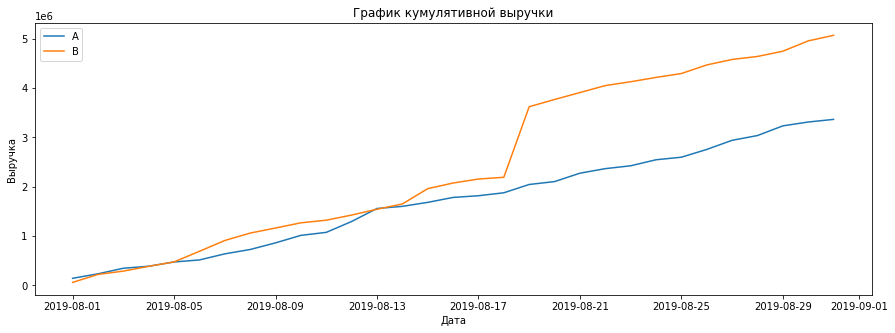

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# размеры графика
plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы B резко растет в одной точки. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Группа А стабильно хуже по выручке на всем протяжении времени.

- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

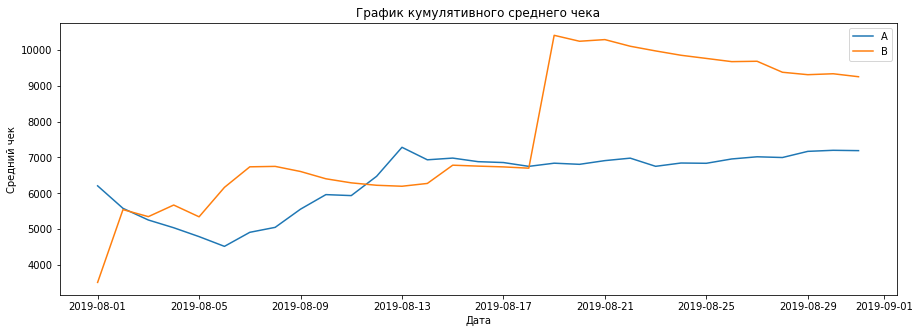

In [37]:
# зададим размеры графика
plt.figure(figsize=(15,5))

# строим график среднего чека группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend() 
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Средний чек становится равномерным ближе к концу теста: установился и для группы A и чуть падает для группы B. 
Так же для группы В наблюдается резкий скачок среднего чека в тот же день, что и скачок в выручке (18-19 августа).
Возможно, это связано с попаданием крупных заказов в этот момент. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

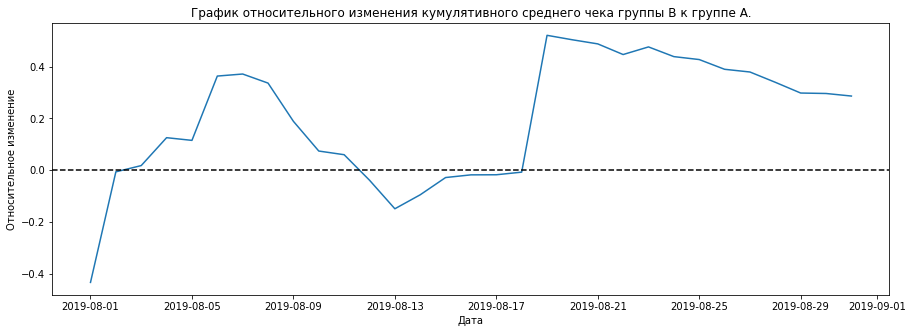

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размеры графика
plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Скорее всего это может значить о наличие крупных заказов и выбросов.

- Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

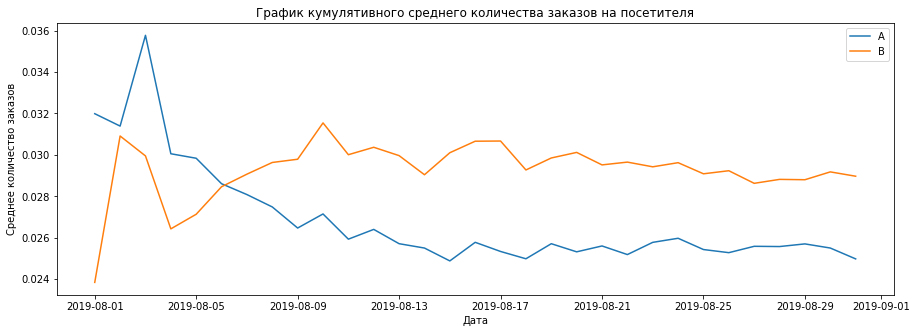

In [39]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# задаем размеры графика
plt.figure(figsize=(15,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()
plt.show()



Получился практически симметричный график. В начале наблюдались колебания, но затем у группы B среднее количество заказов вырвалось вперёд и примерно зафиксировалось в одной области/диапазоне, у группы B — просело, но тоже зафиксировалось.

- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем  выводы и предположения.

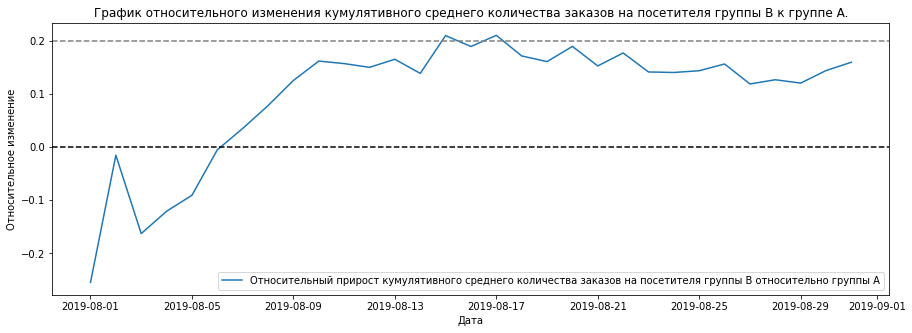

In [40]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размеры графика
plt.figure(figsize=(15,5))

# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.show()

В начале теста группа B проигрывала группе A, но затем значительно вырвалась вперёд (дойдя до максимально изменения в районе 20 % прироста относительно А). Далее среднее количество заказов на посетителя для группы B от макисмально достигавшего результата чуть уменьшалось (до 10-15%) и колеблется в этом районе.

- Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [41]:
# сводная таблица для количества заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# присвоим столбцам понятные названия
ordersByUsers.columns = ['user_id', 'orders']

# отсортируем по количеству заказов и выведем первые строки таблицы
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Есть пользователи, которые совершали 2,3 заказа. Больше, чем обычный пользователь за неделю.

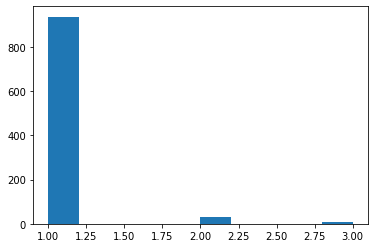

In [42]:
# построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders']) 
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна. 

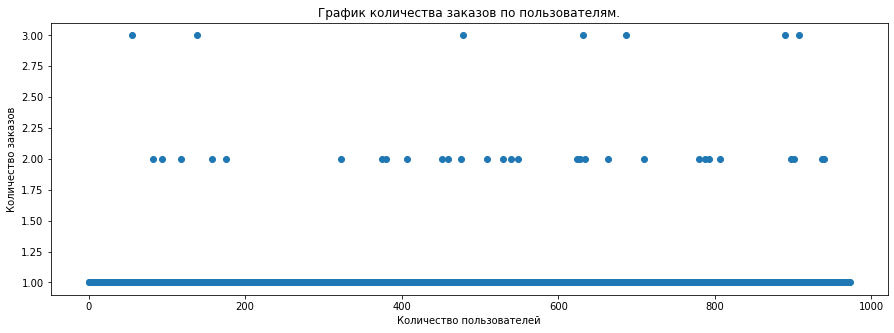

In [43]:
# серия чисел от 0 до указанного в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

# задаем размеры графика
plt.figure(figsize=(15,5))

# построим точечную диаграмму числа заказов на одного пользователя
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям.')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Предварительные выводы подтверждаются: большинство пользователей делают 1 заказ, более 2 заказаов наблюдается редко.

- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [44]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. И лишь 1% пользователей заказывали более 2 раз. 
Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов и отсеим аномальных пользователей по ней.

- Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [45]:
# отсортируем стоимость заказов по убыванию и выведем первые строки таблицы
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
1136,1307669133,92550
744,888512513,86620
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710
949,887908475,60450
940,4003628586,58550
131,2254586615,53904


Первые позиции занимают аномально дорогие покупки.

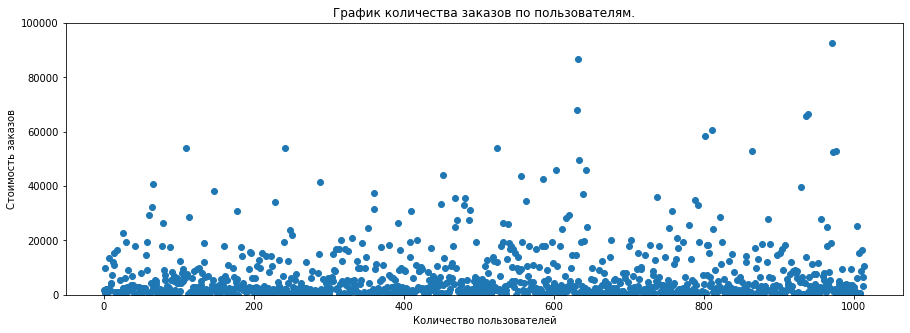

In [46]:
# серия чисел от 0 до указанного в orders['revenue']
x_values = pd.Series(range(0,len(orders['revenue'])))

# задаем размеры графика
plt.figure(figsize=(15,5))

# построим точечную диаграмму числа заказов на одного пользователя
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0,100000)
plt.title('График количества заказов по пользователям.')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Заказы на 1,2 млн. и 200 тыс. сильно выбиваются.\
Ограничим график 100 тыс.руб и посмотрим ещё раз:
Заказы свыше 20 тыс. редки.\
Для более детального анализа расчитаем перцентили и отсеим 5% наблюдений с крайними значениями.

- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [47]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Выберем 30000 рублей за верхнюю границу стоимости заказов и отсеим аномальных пользователей по ней.

- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [48]:
# подготовим данные
# количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#  количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов в выбранную дату в группе A и суммарная выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#  суммарное число заказов до выбранной даты включительно в группе A суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество заказов в выбранную дату в группе B суммарная выручка в выбранную дату в группе B суммарная выручка до выбранной даты включительно в группе B;
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#  суммарное количество заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим данные в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# выведем первые строки на экран
data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [49]:
# cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Сформулируем гипотезы.\
Нулевая: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем между группами есть.

In [50]:
# посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим тест Манна-Уитни. 
# выведим p-value для сравнения среднего между группами
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

# выведем относительное различие в среднем между группами
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
0.160


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "сырых данных" говорит нам о том, что между в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16 %.

- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [51]:
# Посчитаем статистическую значимость различия средних чеков между группами. 
# Выведем p-value для сравнения средних чеков между группами
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# относительный прирост среднего чека группы B
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
0.287


P-value больше 0.05 - принимаем нулевую гипотезу. Статистически значимых различий в среднем чеке между группами нет, несмотря на относительное различие среднего чека между сегментами в 28.7%.

- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 30 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.\
Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64
49


Всего аномальных пользователей 49. 

In [53]:
# подготовим выборки очищенных данных количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [54]:
# посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным
print('p-value:{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:0.010
0.187


Как и в случае с "сырыми данными" статистическая значимость достигнута. Отвергаем нулевую гипотезу. Сегмент B значительно лучше сегмента А. Относительный прирост среднего группы В к конверсии группы А увеличился до 18.7 %.

- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [55]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print(
    'p-value : {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value : 0.741
-0.027


Как и в случае с "сырыми данными" p-value значительно больше 0.05 - принимаем нулевую гипотезу. Наблюдаемое различие в 2.7% в среднем чеке между группами А и В не является статистически значимым.

- Принятие решения по результатам теста:

В результате проведенного А/В теста мы получили такие результаты :
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Несмотря на то, что средний чек в абсолютном значении группы В отличается на 28.7% от группы А статистически значимого различия по среднему чеку между группами нет. После удаления аномалий статистически значимое различие не появилось, а средний чек группы В оказался на 2.7 % ниже группы А.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из вышеперечисленного предлагаю принять тест успешным, зафиксировав победу за В и остановить тест.

### Вывод

В результате анализа 9 гипотез и А/В теста для увеличения выручки крупного интернет-магазина было определено:

**Приоритизация гипотез**

Приоритизация осуществлялась по 2 фреймворкам : ICE и RICE.

ТОП-5 наиболее перспективные гипотезы по ICE:
1. Запустить акцию, дающую скидку на товар в день рождения. Гипотеза № 9
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Гипотеза № 1
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Гипотеза № 8
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. Гипотеза № 7
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Гипотеза № 3 

ТОП-5 наиболее перспективные гипотезы по RICE:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Гипотеза № 8

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Гипотеза № 3

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Гипотеза № 1

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. Гипотеза № 7

5. Запустить акцию, дающую скидку на товар в день рождения. Гипотеза № 9

Как видно из рейтинга, распределение мест изменилось при применении фреймворка RICE относительно ICE. В первую очередь, это связано с добавлением параметра `reach` - параметр, учитывающий охват пользователей, которых эта гипотеза затронет. Так, гипотеза №8 (добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) затрагивает всех пользователей, поэтому охват будет макисмальный, а гипотеза №9 (запустить акцию, дающую скидку на товар в день рождения) затронет лишь её небольшую часть, в связи с чем охват будет минимальный. Так, происходит перераспределение мест в зависимости об выбранного компанией фреймворка.

**Анализ A/B-теста** 

Анализ A/B-теста показал следующее :

- Не более 5% пользователей оформляли больше 1 заказов и не более 1% более 2 заказов.
- Стоимость заказов дороже 26 785 рублей составляет лишь 5% от общего цисла заказов, а дороже 53 904 рублей не более 1 %
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.Относительный прирост среднего группы В к конверсии группы А равен 16 %
- Несмотря на то, что средний чек в абсолютном значении группы В отличается на 28.7% от группы А статистически значимого различия по среднему чеку между группами нет. После удаления аномалий статистически значимое различие не появилось, а средний чек группы В оказался на 2.7% ниже группы А.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.

**Исходя из вышеперечисленного** предлагаю принять тест успешным, зафиксировав победу за В и остановить тест.